<a href="https://colab.research.google.com/github/marcinwolter/DeepLearning_2020/blob/main/simple_mnist_mdn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST dense net with Mixture Density Network
A skeleton!

Based on:
https://keras.io/examples/vision/mnist_convnet/ 

## Setup

In [22]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt


## Prepare the data

In [23]:

def prepare_data(x_train, y_train, x_test, y_test,num_classes):
  #Select 2 classes
  N_CLASSES = num_classes

  indices = np.where(y_train < N_CLASSES) # if few classes needed
  indices = indices[0]
  np.random.shuffle(indices)
  x_train = x_train[indices]
  y_train = y_train[indices]

  indices = np.where(y_test < N_CLASSES) # if few  classes only
  indices = indices[0]
  np.random.shuffle(indices)
  x_test = x_test[indices]
  y_test = y_test[indices]

  # Scale images to the [0, 1] range
  x_train = x_train.astype("float32") / 255
  x_test = x_test.astype("float32") / 255
  # Make sure images have shape (28, 28, 1)
  x_train = np.expand_dims(x_train, -1)
  x_test = np.expand_dims(x_test, -1)
  print("x_train shape:", x_train.shape)
  print(x_train.shape[0], "train samples")
  print(x_test.shape[0], "test samples")


  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  
  return x_train, y_train, x_test, y_test

In [24]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, y_train, x_test, y_test = prepare_data(x_train, y_train, x_test, y_test,num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# **Install keras-mdn-layer**

In [25]:
! pip install keras-mdn-layer
import mdn

Parameters for MDN

In [26]:
N_HIDDEN = 256 #256  # number of hidden units in the Dense layer
N_MIXES = 1  # number of mixture components
OUTPUT_DIMS = num_classes  # number of real-values predicted by each mixture component


## Build the model

In [27]:
model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(layers.Flatten())
model.add(layers.Dense(N_HIDDEN, activation="relu"))
model.add(layers.Dense(N_HIDDEN, activation="relu"))
model.add(layers.Dense(N_HIDDEN, activation="relu"))

#model.add(layers.Dense(OUTPUT_DIMS, activation="softmax"))
model.add(mdn.MDN(OUTPUT_DIMS, N_MIXES))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
mdn_1 (MDN)                  (None, 21)                5397      
Total params: 337,941
Trainable params: 337,941
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [28]:
batch_size = 128
epochs = 30

# This is for normal dense network
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.compile(loss=mdn.get_mixture_loss_func(OUTPUT_DIMS,N_MIXES), optimizer="adam", metrics=["accuracy"])


model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test)) #validation_split=0.1)

Epoch 1/30
469/469 [==============================] - 5s 7ms/step - loss: -6.8636 - accuracy: 0.3989 - val_loss: -14.7473 - val_accuracy: 0.6921
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: -16.1744 - accuracy: 0.7159 - val_loss: -17.6792 - val_accuracy: 0.7310
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: -18.2155 - accuracy: 0.7404 - val_loss: -18.3712 - val_accuracy: 0.7673
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: -19.6184 - accuracy: 0.7633 - val_loss: -20.8603 - val_accuracy: 0.7778
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: -20.8888 - accuracy: 0.7770 - val_loss: -22.7012 - val_accuracy: 0.7810
Epoch 6/30
469/469 [==============================] - 3s 7ms/step - loss: -23.5972 - accuracy: 0.7829 - val_loss: -24.8612 - val_accuracy: 0.7791
Epoch 7/30
469/469 [==============================] - 3s 7ms/step - loss: -21.7864 - accuracy: 0.7537 - val_loss: -24.3519 - 

# **Model prediction with MDN**

In [32]:
y_test_out = model.predict(x_test)

print(y_test_out)

[[ 1.06760103e-03  4.42936225e-03 -8.08805926e-05 ...  2.84439325e-03
   8.49516392e-02  2.04737820e-02]
 [ 2.10619375e-01  9.15340148e-04  2.44552381e-02 ...  6.26988053e-01
   1.00539505e-01  1.39375478e-01]
 [ 8.46166313e-01  1.94261037e-03  2.57695699e-03 ...  1.15927458e-02
   1.57126784e-02 -1.22805610e-01]
 ...
 [ 5.20967273e-03  3.16716824e-03  2.35423399e-03 ...  3.65666747e-02
   2.27487981e-01 -2.83216871e-02]
 [ 1.67613500e-04 -5.05319797e-04  7.37179187e-04 ...  3.94374132e-03
   3.09330225e-02 -7.77892768e-04]
 [-3.45153967e-04  9.95050073e-01  3.39224702e-04 ...  2.11203098e-03
   2.91043520e-03 -4.89315130e-02]]


In [33]:
# Split up the mixture parameters (for future fun)
# means of Gaussians
mus = y_test_out[:,:N_MIXES*OUTPUT_DIMS]
# sigmas of Gaussians
sigs = y_test_out[:,N_MIXES*OUTPUT_DIMS:2*N_MIXES*OUTPUT_DIMS]
#pis = mdn.softmax(y_test_out[:,-N_MIXES:], t=1.0)

print(mus)
print(sigs)

[[ 1.0676010e-03  4.4293622e-03 -8.0880593e-05 ...  7.0078215e-03
   1.4372226e-03  9.0731919e-01]
 [ 2.1061938e-01  9.1534015e-04  2.4455238e-02 ... -4.5859106e-03
   7.7523100e-01 -9.8340795e-05]
 [ 8.4616631e-01  1.9426104e-03  2.5769570e-03 ...  1.8191547e-04
   2.2983765e-03 -5.7516131e-03]
 ...
 [ 5.2096727e-03  3.1671682e-03  2.3542340e-03 ...  9.3528605e-04
  -6.7830915e-03  9.5783668e-03]
 [ 1.6761350e-04 -5.0531980e-04  7.3717919e-04 ...  4.0980987e-04
   4.1108765e-04  3.0354066e-03]
 [-3.4515397e-04  9.9505007e-01  3.3922470e-04 ... -6.8711513e-04
   4.9024494e-04  3.5520663e-04]]
[[0.00142133 0.00166428 0.0015732  ... 0.00419623 0.00284439 0.08495164]
 [0.53188396 0.0084691  0.11529976 ... 0.01006353 0.62698805 0.10053951]
 [0.17023683 0.00651085 0.00718194 ... 0.00716996 0.01159275 0.01571268]
 ...
 [0.00498456 0.00585169 0.00816888 ... 0.00652868 0.03656667 0.22748798]
 [0.00175345 0.00233483 0.00221568 ... 0.00311273 0.00394374 0.03093302]
 [0.00148791 0.04341042 0.0014

Average error on probability =  0.0449017


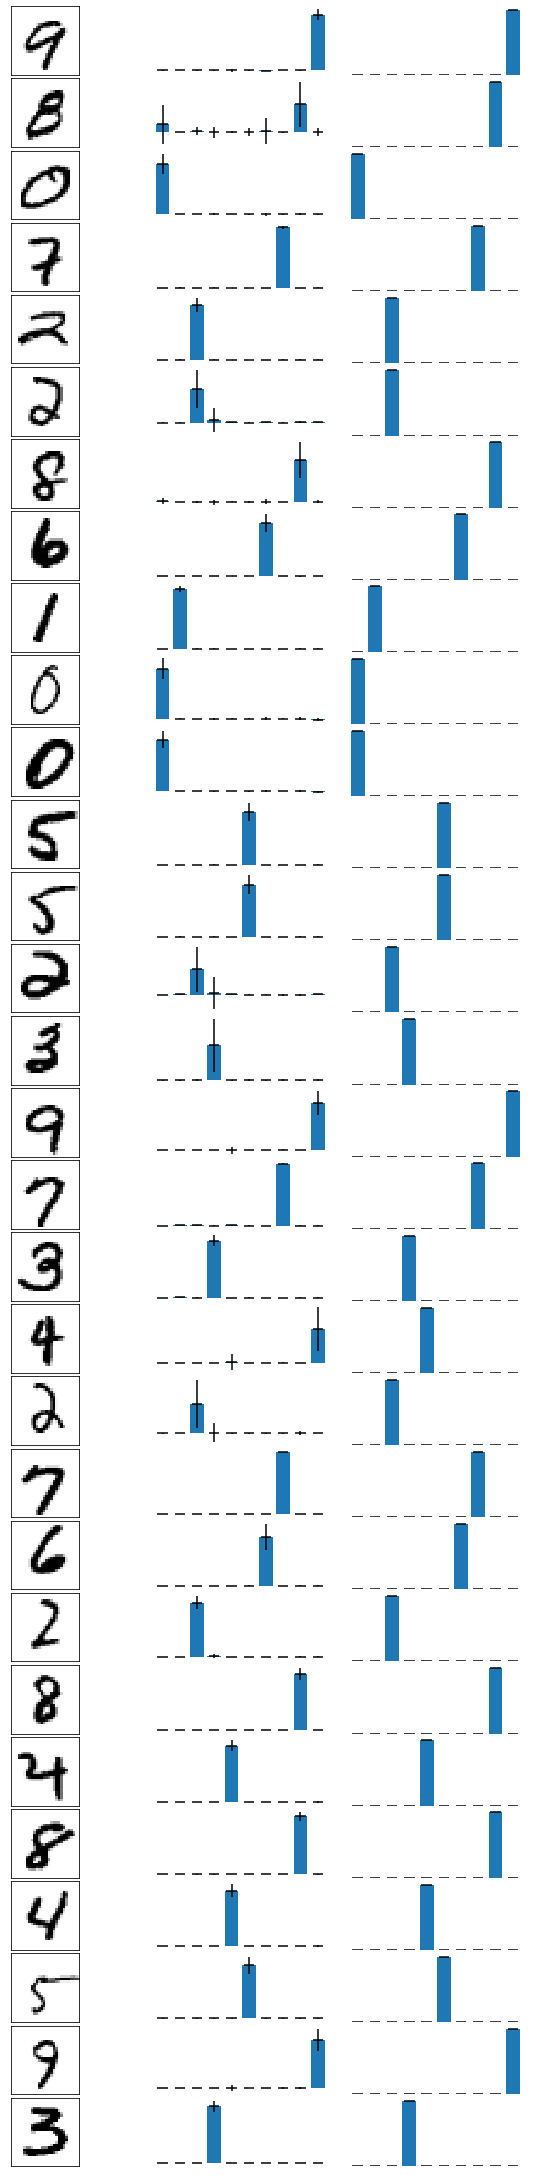

In [41]:
# use the model to predict the labels of the test data



# Plot the prediction
fig = plt.figure(figsize=(8, 30))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
n_img=30
for i in range(n_img):
    ax = fig.add_subplot(n_img, 3, 3*i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

    ax = fig.add_subplot(n_img, 3, 3*i + 2, xticks=[0,1,2,3,4,5,6,7,8,9], yticks=[])
    xbar = np.linspace(1, OUTPUT_DIMS, num=OUTPUT_DIMS)
    ax.bar(xbar,mus[i],yerr=sigs[i],xerr=0.3,)
###    ax.bar(xbar,y_test_out[i],yerr=0,xerr=0.3,)
    ax.axis('off')

    ax = fig.add_subplot(n_img, 3, 3*i + 3, xticks=[0,1,2,3,4,5,6,7,8,9], yticks=[])
    xbar = np.linspace(1, OUTPUT_DIMS, num=OUTPUT_DIMS)
    ax.bar(xbar,y_test[i],yerr=0.0,xerr=0.3)
    ax.axis('off')

    #print(mus[i])
    #print(sigs[i])
    #print(pis[i])

print("Average error on probability = ",np.mean(sigs))    

# **Load fashion MNIST**

In [35]:
# Model / data parameters
num_classes_f = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(xf_train, yf_train), (xf_test, yf_test) = keras.datasets.fashion_mnist.load_data()

xf_train, yf_train, xf_test, yf_test = prepare_data(xf_train, yf_train, xf_test, yf_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# **Test fashion MNIST using the network trained on digits**

In [36]:
yf_test_out = model.predict(xf_test)


In [37]:
# Split up the mixture parameters (for future fun)
# means of Gaussians
musf = yf_test_out[:,:N_MIXES*OUTPUT_DIMS]
# sigmas of Gaussians
sigsf = yf_test_out[:,N_MIXES*OUTPUT_DIMS:2*N_MIXES*OUTPUT_DIMS]
#pis = mdn.softmax(y_test_out[:,-N_MIXES:], t=1.0)


Average error on probability =  0.159356


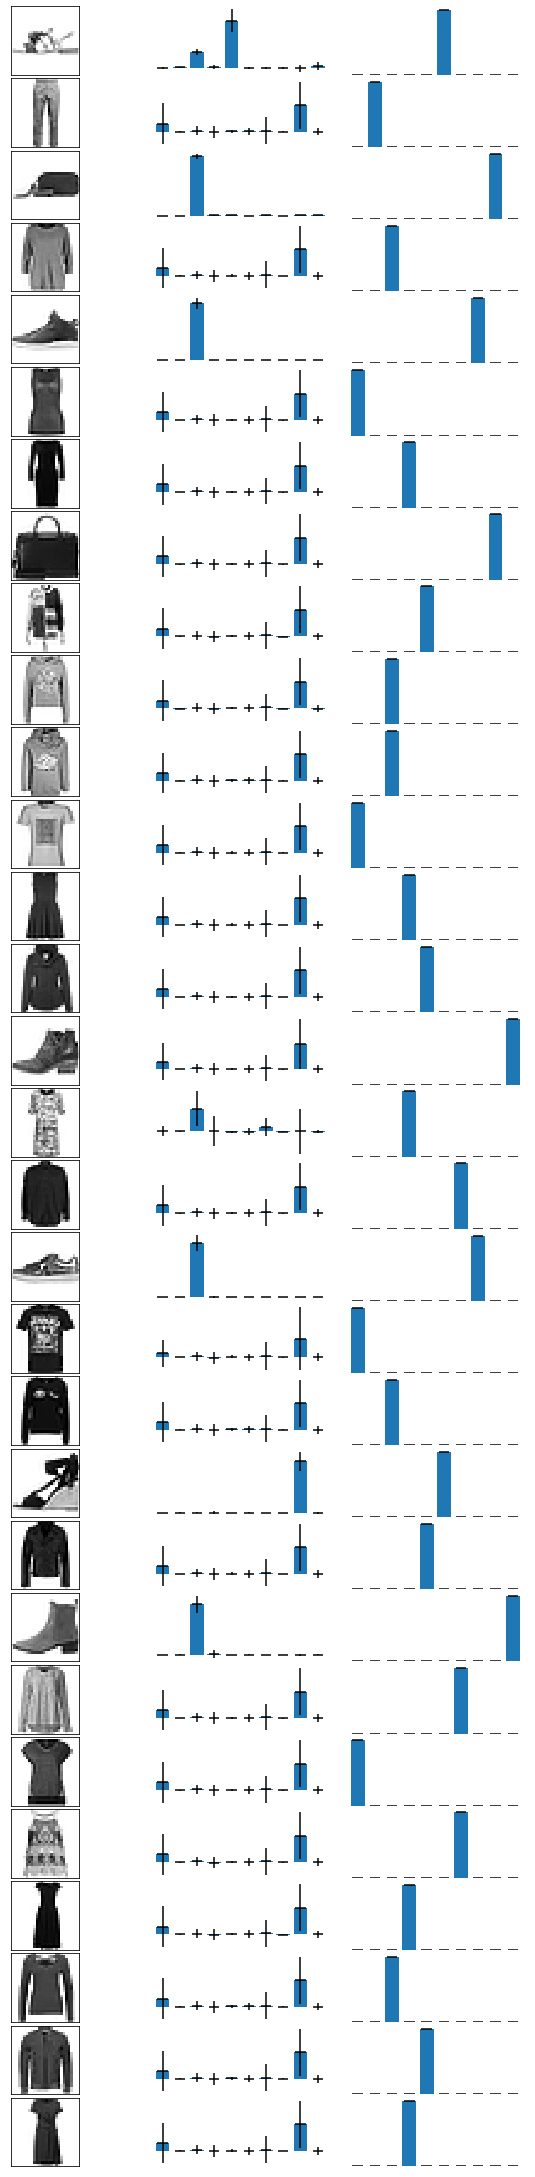

In [40]:
# use the model to predict the labels of the test data



# Plot the prediction
fig = plt.figure(figsize=(8, 30))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
n_img=30
for i in range(n_img):
    ax = fig.add_subplot(n_img, 3, 3*i + 1, xticks=[], yticks=[])
    ax.imshow(xf_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

    ax = fig.add_subplot(n_img, 3, 3*i + 2, xticks=[0,1,2,3,4,5,6,7,8,9], yticks=[])
    xbar = np.linspace(1, OUTPUT_DIMS, num=OUTPUT_DIMS)
    ax.bar(xbar,musf[i],yerr=sigsf[i],xerr=0.3)  #,yerr=sigsf[i]
    ax.axis('off')

    ax = fig.add_subplot(n_img, 3, 3*i + 3, xticks=[0,1,2,3,4,5,6,7,8,9], yticks=[])
    xbar = np.linspace(1, OUTPUT_DIMS, num=OUTPUT_DIMS)
    ax.bar(xbar,yf_test[i],yerr=0.0,xerr=0.3)
    ax.axis('off')

    

print("Average error on probability = ",np.mean(sigsf))    